In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams['xtick.labelsize'] = 15.
plt.rcParams['ytick.labelsize']= 15.
plt.rcParams['axes.labelsize'] = 15.
plt.rcParams['legend.fontsize'] = 13.
plt.rcParams['figure.figsize'] = [15.,8.]

In [3]:
# Import dataset 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Checking for missing data

In [7]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_null = train[["Age","Cabin"]]    

In [9]:
def missing_value(df_null):
    null_value = df_null.isnull().sum().sort_values(ascending=False)
    null_percentage = (df_null.isnull().sum()/df_null.isnull().count()).sort_values(ascending=False)
    missing = pd.concat([null_value,null_percentage],axis=1, keys=["null_value", "null_percentage"])
    return missing
missing_value(df_null)

,null_value,null_percentage
Cabin,687,0.771044
Age,177,0.198653


## Comments:
### Approx 77 percent data is missing from cabin column 
### Approx 20 percent data is missing from Age column

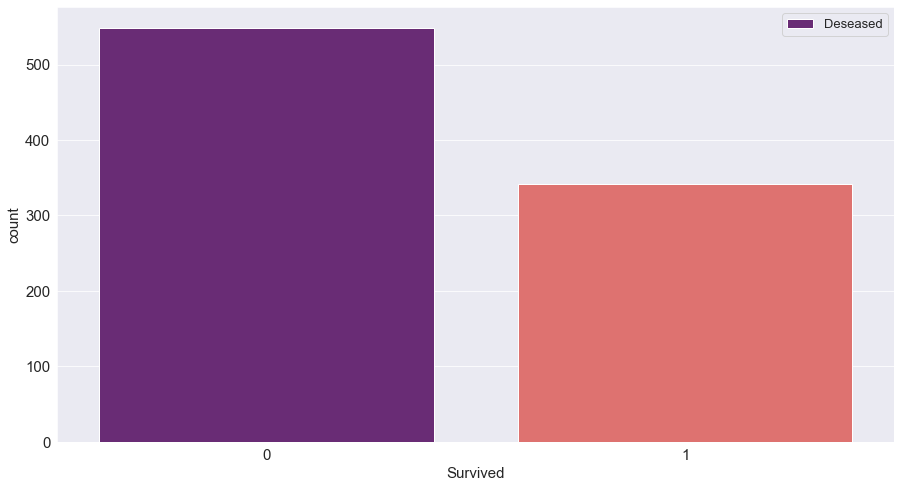

In [10]:
sns.set_style("darkgrid")
sns.countplot(data=train, x="Survived", palette="magma")
plt.legend(["Deseased"]);

### Deseased count is almost double the count of survived

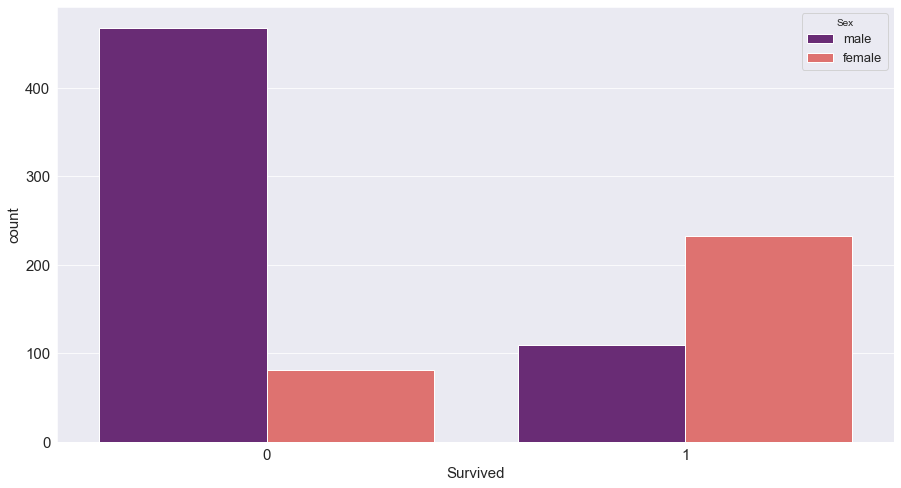

In [11]:
sns.countplot(data=train,x="Survived", hue="Sex", palette="magma");

## The count of survives females are more than the male survived

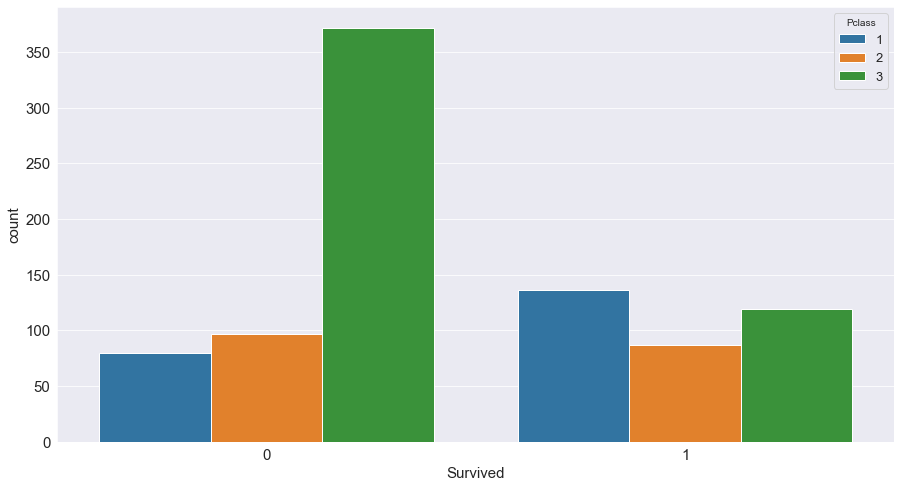

In [12]:
sns.countplot(data=train,x="Survived", hue="Pclass", palette="tab10");

### Pclass 3 has high count fot those who did'nt survived 
### Pclass 1 has the highest count for those who survived

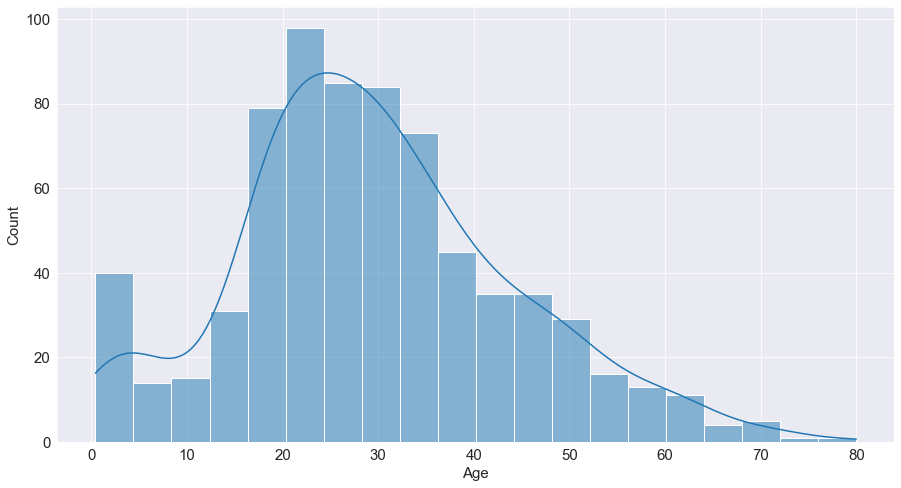

In [13]:
sns.histplot(x=train["Age"].dropna(), kde=True);

### Most passenger are of age group 20 to 33 

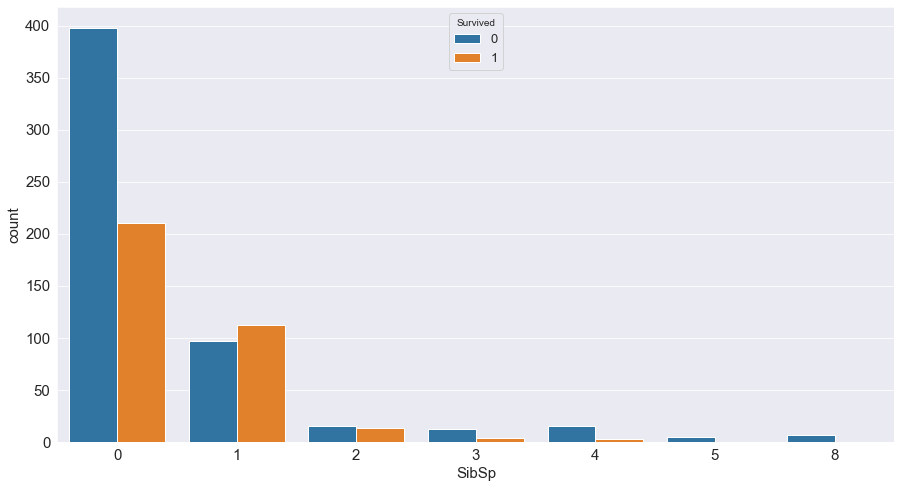

In [14]:
sns.countplot(data=train, x="SibSp", hue="Survived");

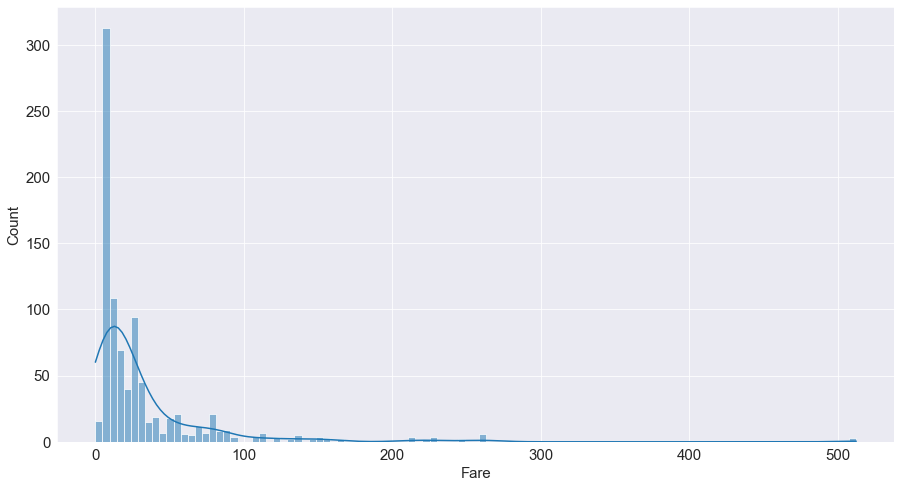

In [15]:
sns.histplot(data=train, x="Fare", kde=True, palette="magma");

### As we can see most paid fare less than 150

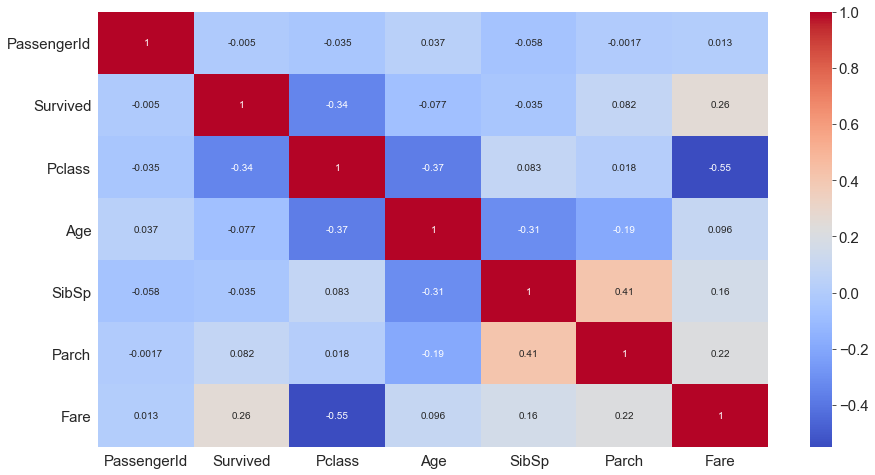

In [16]:
train_corr = train.corr()
sns.heatmap(data=train_corr,annot=True,cmap='coolwarm');

In [17]:
train["Age"].fillna(train["Age"].mean(), inplace=True)

In [18]:
train.drop(["Cabin"], axis=1, inplace=True)

In [19]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
# Droping name and ticket column
train.drop(["Name", "Ticket"], axis=1,inplace=True)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [23]:
# changing categorical features into numeric value
sex_dummies = pd.get_dummies(train["Sex"], drop_first=True)
embark = pd.get_dummies(train["Embarked"], drop_first=True)
train = pd.concat([train,sex_dummies,embark],axis=1)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [25]:
# Drop Sex and Embark Column
train.drop(["Sex","Embarked"],axis=1,inplace=True)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [27]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

### No missing data

In [28]:
train.dropna(inplace=True)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [30]:
x =train.drop(["Survived"],axis=1)
y = train["Survived"]

In [31]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2, random_state=42)

In [32]:
models = {"Logistic Regression":LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier(),
          "Naive Bayes": GaussianNB(),
          "Desicion Tree": DecisionTreeClassifier(),
          "KNN": KNeighborsClassifier()
         }
def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train,y_train)
        y_preds = model.predict(x_test)
        model_scores[name] = model.score(x_test,y_test)
        
    return model_scores

In [35]:
score = fit_and_score(models=models,
                 x_train=x_train,
                 x_test = x_test,
                 y_train = y_train,
                 y_test = y_test)
score

{'Logistic Regression': 0.7821229050279329,
 'RandomForestClassifier': 0.8324022346368715,
 'Naive Bayes': 0.770949720670391,
 'Desicion Tree': 0.7430167597765364,
 'KNN': 0.659217877094972}

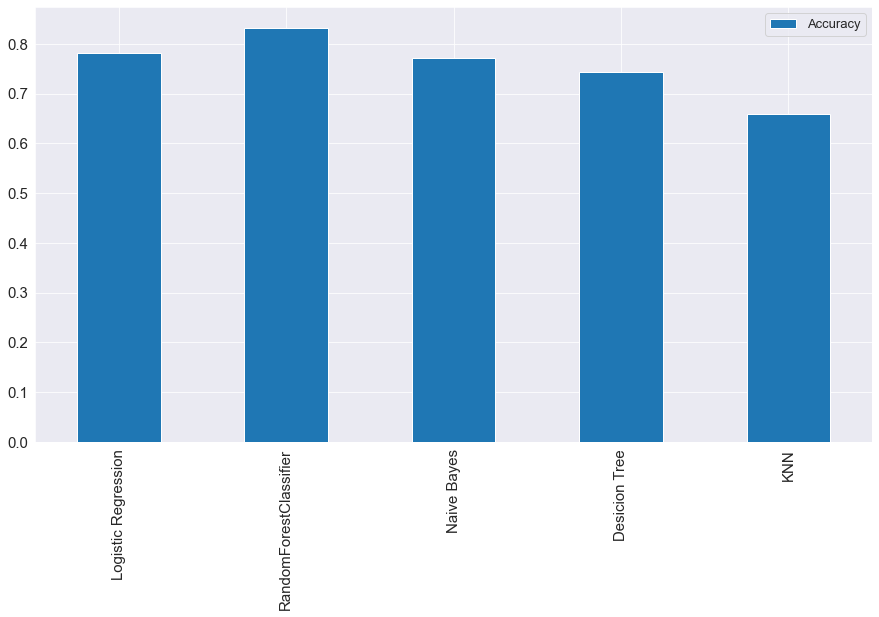

In [36]:
compare_score = pd.DataFrame(score, index=["Accuracy"])
compare_score.T.plot.bar();

## Random Forest Classifier perform better

In [37]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [38]:
rf_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [39]:
np.random.seed(42)
gs_rf_grid = GridSearchCV(RandomForestClassifier(),
                         param_grid=rf_grid,
                         cv=5,
                         verbose= True,
                         n_jobs=1)
gs_rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=True)

In [40]:
gs_rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 64}

In [44]:
rf_clf = RandomForestClassifier( bootstrap = False, max_depth= 4, max_features= 'auto',min_samples_leaf= 2,min_samples_split= 5,n_estimators= 64)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=4, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=64)

In [45]:
rf_clf.score(x_train,y_train)

0.8412921348314607

In [46]:
y_preds = rf_clf.predict(x_test)
accuracy_score(y_test,y_preds)

0.8212290502793296

In [47]:
acc_cv = cross_val_score(rf_clf,
               x,
               y,
               scoring = "accuracy",
               cv=5)
acc_cv.mean()

0.8081790220325151

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [127]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [129]:
len(test)

418

In [130]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [131]:
test["Fare"].fillna(test["Fare"].mean(),inplace=True)

In [132]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [133]:
test.drop(["Cabin"],axis=1,inplace=True)

In [134]:
len(test)

418

In [135]:
test["Age"].fillna(test["Age"].mean(), inplace=True)

In [136]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [137]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [138]:
sex_column = pd.get_dummies(test["Sex"], drop_first=True)
embark_column = pd.get_dummies(test["Embarked"], drop_first=True)

In [139]:
test = pd.concat([test,sex_column,embark_column],axis=1)

In [140]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1


In [141]:
test.drop(["Name","Sex","Embarked"], axis=1, inplace=True)

In [142]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,892,3,34.5,0,0,330911,7.8292,1,1,0
1,893,3,47.0,1,0,363272,7.0000,0,0,1
2,894,2,62.0,0,0,240276,9.6875,1,1,0
3,895,3,27.0,0,0,315154,8.6625,1,0,1
4,896,3,22.0,1,1,3101298,12.2875,0,0,1


In [143]:
test.drop(["Ticket"],axis=1,inplace=True)

In [144]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [145]:
submission_pred = rf_clf.predict(test)

In [146]:
len(test)

418

In [147]:
df = pd.DataFrame({"PassengerId":test["PassengerId"],
                "Survived":submission_pred})

In [149]:
df.to_csv("submitpreds.csv", index=False)